In [2]:
import pandas as pd

## Load dataset

In [3]:
train = pd.read_csv("data/bike/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("data/bike/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### parse datetime

In [6]:
# parse datetime
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

In [7]:
print(train.shape)

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# Make new column : dayofweek
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

# One-Hot Encoding : season, weather
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

# One-Hot Encoding : dayofweek
train["datetime-dayofweek0"] = train["datetime-dayofweek"] == 0
train["datetime-dayofweek1"] = train["datetime-dayofweek"] == 1
train["datetime-dayofweek2"] = train["datetime-dayofweek"] == 2
train["datetime-dayofweek3"] = train["datetime-dayofweek"] == 3
train["datetime-dayofweek4"] = train["datetime-dayofweek"] == 4
train["datetime-dayofweek5"] = train["datetime-dayofweek"] == 5
train["datetime-dayofweek6"] = train["datetime-dayofweek"] == 6

# Fill Missing data(windspeed)
# First fill the windspeed by using All avr.
train["windspeed"] = train["windspeed"].replace(0, train["windspeed"].mean())
# Fill Missing data(humidity)
train["humidity"] = train["humidity"].replace(0, train["humidity"].mean())
# train
print(train.shape)
#train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

# Save modified train data
train.to_csv("data/bike/train_rev1.csv", index=False)

(10886, 12)
(10886, 34)


In [6]:
# Test cell
#train["windspeed"] == 0
#train["datetime-year_month_day"] = train["datetime"].dt.year.astype(str) + "-" + train["datetime"].dt.month.astype(str) + "-" + train["datetime"].dt.day.astype(str)

#def fillWindspeed():
#    # Find the day windspeed data.

#count = 0
#ttrain = train[train["datetime-year_month_day"] == "2011-1-"+str(1)]
#print(ttrain.shape)
# ttrain[ttrain["windspeed"] != 0].column()

   #     print(ttrain.shape)

In [8]:
pd.read_csv("data/bike/train_rev1.csv")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,weather_2,weather_3,weather_4,datetime-dayofweek0,datetime-dayofweek1,datetime-dayofweek2,datetime-dayofweek3,datetime-dayofweek4,datetime-dayofweek5,datetime-dayofweek6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,12.799395,3,...,False,False,False,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,12.799395,8,...,False,False,False,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,12.799395,5,...,False,False,False,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,12.799395,3,...,False,False,False,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,12.799395,0,...,False,False,False,False,False,False,False,False,True,False
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75.0,6.003200,0,...,True,False,False,False,False,False,False,False,True,False
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80.0,12.799395,2,...,False,False,False,False,False,False,False,False,True,False
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86.0,12.799395,1,...,False,False,False,False,False,False,False,False,True,False
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75.0,12.799395,1,...,False,False,False,False,False,False,False,False,True,False
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76.0,12.799395,8,...,False,False,False,False,False,False,False,False,True,False


In [9]:
print(test.shape)

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# Make new column : dayofweek
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

# One-Hot Encoding : season, weather
test["season_1"] = test["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

# One-Hot Encoding : dayofweek
test["datetime-dayofweek0"] = test["datetime-dayofweek"] == 0
test["datetime-dayofweek1"] = test["datetime-dayofweek"] == 1
test["datetime-dayofweek2"] = test["datetime-dayofweek"] == 2
test["datetime-dayofweek3"] = test["datetime-dayofweek"] == 3
test["datetime-dayofweek4"] = test["datetime-dayofweek"] == 4
test["datetime-dayofweek5"] = test["datetime-dayofweek"] == 5
test["datetime-dayofweek6"] = test["datetime-dayofweek"] == 6

# Fill Missing data(windspeed)
# First fill the windspeed by using All avr.
test["windspeed"] = test["windspeed"].replace(0, test["windspeed"].mean())
# Fill Missing data(humidity)
test["humidity"] = test["humidity"].replace(0, test["humidity"].mean())

# test
print(test.shape)
#test[["datetime", "datetime-year", "datetime-month", "datetime-day",
#          "datetime-hour", "datetime-minute", "datetime-second","datetime-dayofweek"]].head()

# Save modified test data
test.to_csv("data/bike/test_rev1.csv", index=False)

(6493, 9)
(6493, 31)


In [10]:
pd.read_csv("data/bike/test_rev1.csv")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,weather_2,weather_3,weather_4,datetime-dayofweek0,datetime-dayofweek1,datetime-dayofweek2,datetime-dayofweek3,datetime-dayofweek4,datetime-dayofweek5,datetime-dayofweek6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,...,False,False,False,False,False,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,12.631157,2011,...,False,False,False,False,False,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,12.631157,2011,...,False,False,False,False,False,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,...,False,False,False,False,False,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,...,False,False,False,False,False,False,True,False,False,False
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.001300,2011,...,False,False,False,False,False,False,True,False,False,False
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.001300,2011,...,False,False,False,False,False,False,True,False,False,False
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.001300,2011,...,False,False,False,False,False,False,True,False,False,False
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.001200,2011,...,False,False,False,False,False,False,True,False,False,False
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.001300,2011,...,True,False,False,False,False,False,True,False,False,False


## Explore

In [11]:
import seaborn as sns

%matplotlib inline

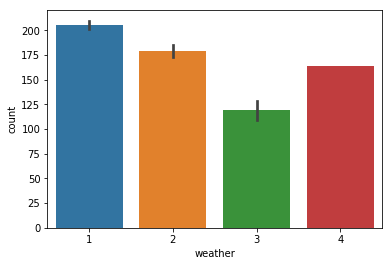

In [11]:
sns.barplot(data=train, x="weather", y="count")

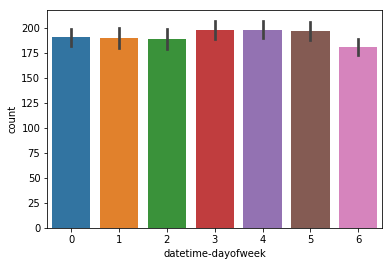

In [12]:
sns.barplot(data=train, x="datetime-dayofweek", y="count")

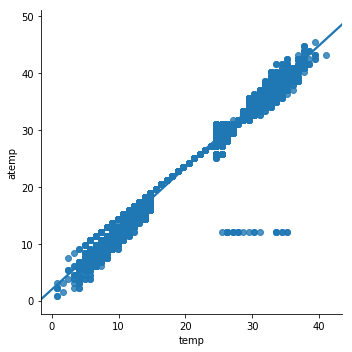

In [13]:
sns.lmplot(data=train, x="temp", y="atemp")

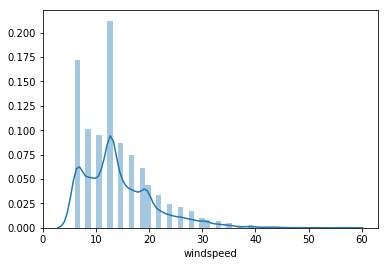

In [14]:
sns.distplot(train["windspeed"])

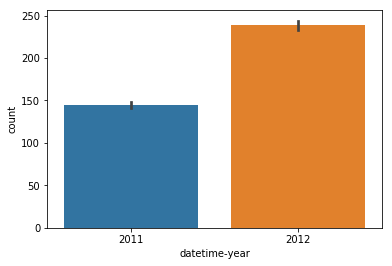

In [15]:
sns.barplot(data=train, x="datetime-year", y="count")

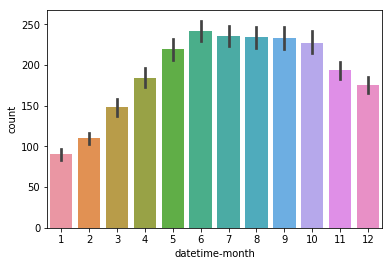

In [16]:
sns.barplot(data=train, x="datetime-month", y="count")

In [17]:
train["datetime-day"].head()
# sns.barplot(date=train, x="datetime-day", y="count")

0    1
1    1
2    1
3    1
4    1
Name: datetime-day, dtype: int64

In [18]:
train["datetime-hour"].head()

0    0
1    1
2    2
3    3
4    4
Name: datetime-hour, dtype: int64

In [19]:
train["datetime-day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

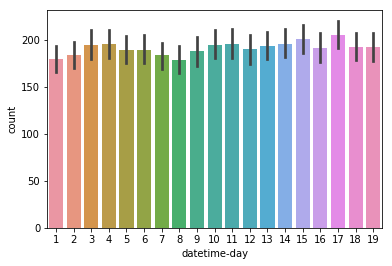

In [20]:
sns.barplot(data=train, x="datetime-day", y="count")

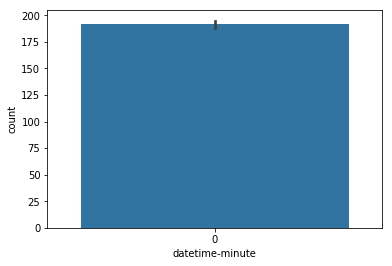

In [21]:
sns.barplot(data=train, x="datetime-minute", y="count")

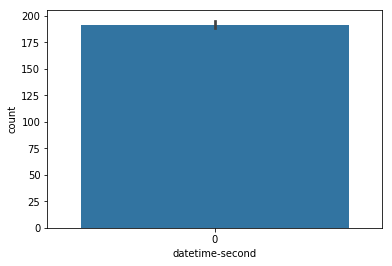

In [22]:
sns.barplot(data=train, x="datetime-second", y="count")

In [23]:
"2011" + "-" + "1"

'2011-1'

In [24]:
train["datetime-year_month"] = train["datetime"].dt.year.astype(str) + "-" + train["datetime"].dt.month.astype(str)
train["datetime-year_month"].tail()

10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime-year_month, dtype: object

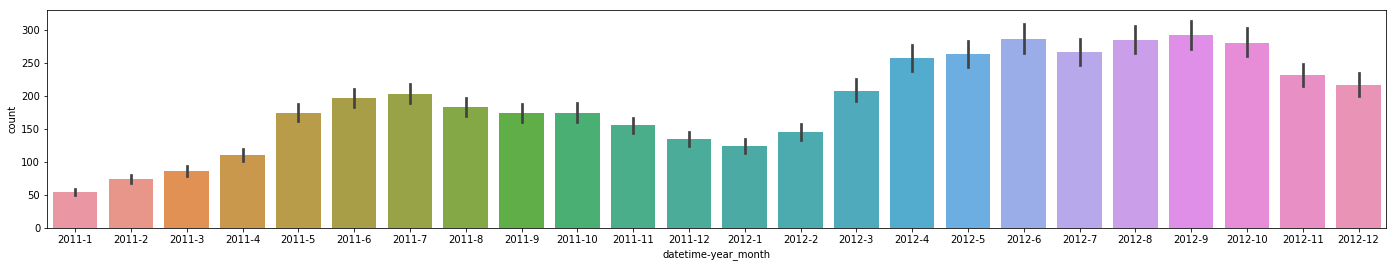

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,4))
sns.barplot(data=train, x="datetime-year_month", y="count")

""" Month가 의미가 없을 수도 있다. """

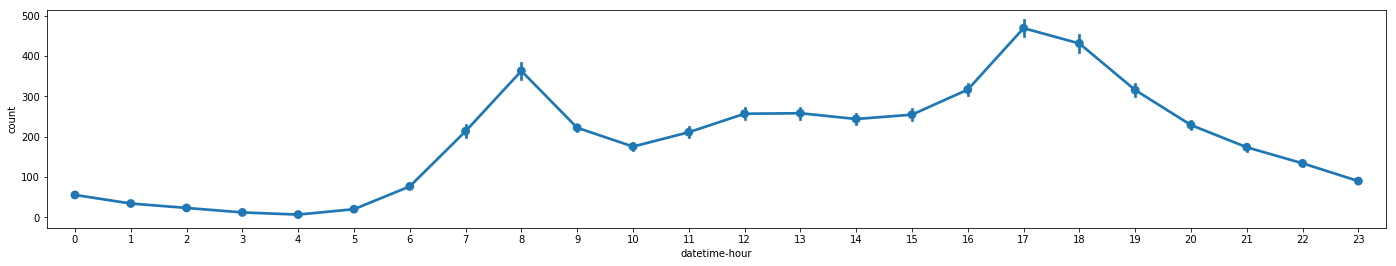

In [26]:
plt.figure(figsize=(24,4))
sns.pointplot(data=train, x="datetime-hour", y="count")

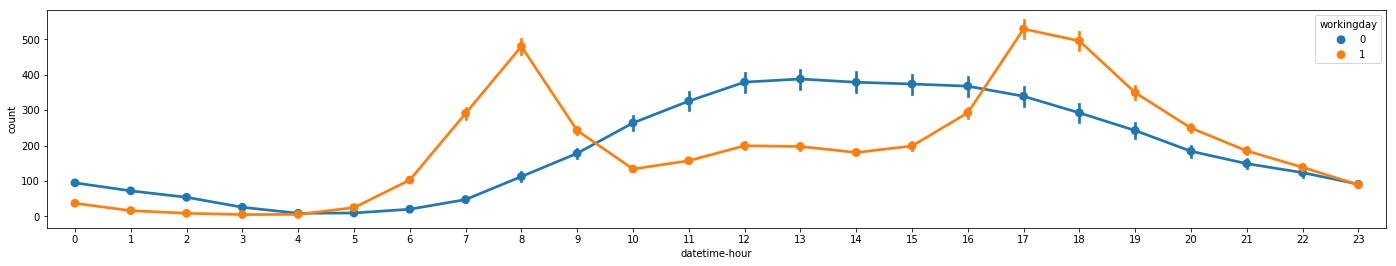

In [27]:
plt.figure(figsize=(24,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

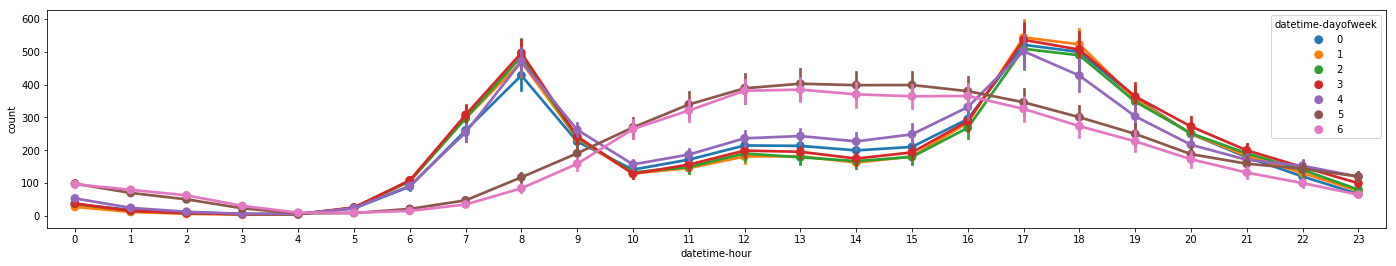

In [28]:
plt.figure(figsize=(24,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek")

## Train

In [27]:
feature_names = ["holiday", "workingday", 
                             "temp", "atemp", "humidity", "windspeed",
                            "datetime-year", "datetime-hour",
                             "season_1", "season_2", "season_3", "season_4",
                            "weather_1", "weather_2", "weather_3",
                             "datetime-dayofweek0", "datetime-dayofweek1", "datetime-dayofweek2",
                             "datetime-dayofweek3", "datetime-dayofweek4",
                            "datetime-dayofweek5", "datetime-dayofweek6"]

feature_names

['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'datetime-dayofweek0',
 'datetime-dayofweek1',
 'datetime-dayofweek2',
 'datetime-dayofweek3',
 'datetime-dayofweek4',
 'datetime-dayofweek5',
 'datetime-dayofweek6']

In [28]:
label_name = "log_count"
label_name

'log_count'

In [29]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 22)


,holiday,workingday,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,season_1,season_2,...,weather_1,weather_2,weather_3,datetime-dayofweek0,datetime-dayofweek1,datetime-dayofweek2,datetime-dayofweek3,datetime-dayofweek4,datetime-dayofweek5,datetime-dayofweek6
0,0,0,9.84,14.395,81.0,12.799395,2011,0,True,False,...,True,False,False,False,False,False,False,False,True,False
1,0,0,9.02,13.635,80.0,12.799395,2011,1,True,False,...,True,False,False,False,False,False,False,False,True,False
2,0,0,9.02,13.635,80.0,12.799395,2011,2,True,False,...,True,False,False,False,False,False,False,False,True,False
3,0,0,9.84,14.395,75.0,12.799395,2011,3,True,False,...,True,False,False,False,False,False,False,False,True,False
4,0,0,9.84,14.395,75.0,12.799395,2011,4,True,False,...,True,False,False,False,False,False,False,False,True,False


In [30]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 22)


,holiday,workingday,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,season_1,season_2,...,weather_1,weather_2,weather_3,datetime-dayofweek0,datetime-dayofweek1,datetime-dayofweek2,datetime-dayofweek3,datetime-dayofweek4,datetime-dayofweek5,datetime-dayofweek6
0,0,1,10.66,11.365,56,26.002700,2011,0,True,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,10.66,13.635,56,12.631157,2011,1,True,False,...,True,False,False,False,False,False,True,False,False,False
2,0,1,10.66,13.635,56,12.631157,2011,2,True,False,...,True,False,False,False,False,False,True,False,False,False
3,0,1,10.66,12.880,56,11.001400,2011,3,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0,1,10.66,12.880,56,11.001400,2011,4,True,False,...,True,False,False,False,False,False,True,False,False,False


In [31]:
# We well use log_count to fit hint this kaggle project.
# label_name = "count"
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

## Use Decision Tree

In [33]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# model

## Use RandomForest

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=45)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

## Evaluate

In [44]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=20)
y_predict

array([3.29230728, 3.20304163, 3.00652434, ..., 5.11805158, 5.14109526,
       4.60459631])

In [45]:
# 이 작업을 트레이닝 전에 해줘야 순서상 맞다

import numpy as np
# MAE(Mean Absolute Error)
# abs(y_predict - y_train).mean()
# MSE(Mean Squared Error)
# np.square(y_predict - y_train).mean()
# RMSE(Root Mean Squared Error)
np.sqrt(np.square(y_predict - y_train).mean())

0.3800290996343356

In [46]:
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# score = mean_absolute_error(y_predict, y_train)
# score = mean_squared_error(y_predict, y_train)
# score = mean_absolute_error(y_predict, y_train)
score = mean_squared_log_error(y_predict, y_train)
#score = np.sqrt(score)

f"score = {score:.5f}"

'score = 0.00910'

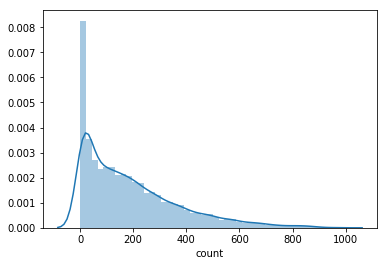

In [38]:
sns.distplot(train["count"])

In [21]:
train["log_count"] = np.log(train["count"] + 1)

print(train.shape)
train[["count", "log_count"]].head()

(10886, 35)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


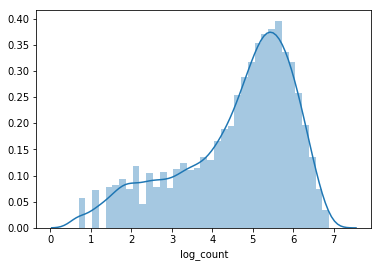

In [22]:
sns.distplot(train["log_count"])

In [24]:
train["count(recover)"] = np.exp(train["log_count"]) - 1

print(train.shape)
train[["count", "log_count", "count(recover)"]].head()

(10886, 36)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


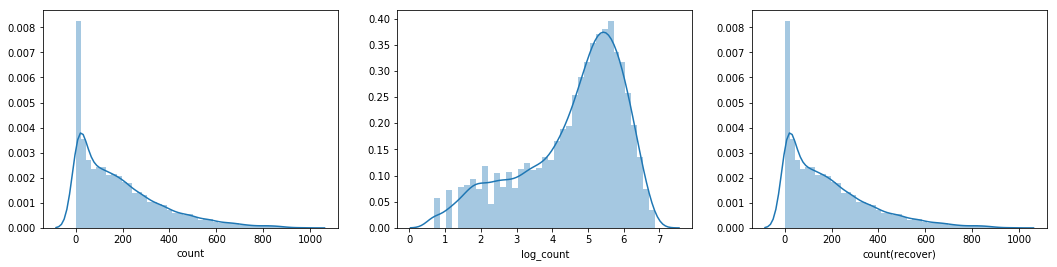

In [26]:
import matplotlib.pyplot as plt

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)

sns.distplot(train["log_count"], ax=ax2)

sns.distplot(train["count(recover)"], ax=ax3)

## Hyperparameter Tunning

### Grid Search

In [58]:
n_estimators = 10
max_depth_list = [3, 5, 7, 9, 11]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for max_depth in max_depth_list : 
    for max_features in max_features_list:
        model = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth=max_depth,
                max_features=max_features,
                random_state=37)
        
        y_predict = cross_val_predict(model, X_train, y_train, cv=20)
        
        score = mean_squared_error(y_predict, y_train)
        score = np.sqrt(score)
        
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, max_features={max_features}, score={score}")

n_estimators=10, max_depth=3, max_features=0.1, score=151.80362613815373
n_estimators=10, max_depth=3, max_features=0.3, score=133.54677953050944
n_estimators=10, max_depth=3, max_features=0.5, score=128.44218115677828
n_estimators=10, max_depth=3, max_features=0.7, score=131.66168972736833
n_estimators=10, max_depth=3, max_features=0.9, score=133.19587436048627
n_estimators=10, max_depth=5, max_features=0.1, score=144.77091268648425
n_estimators=10, max_depth=5, max_features=0.3, score=118.94174027631472
n_estimators=10, max_depth=5, max_features=0.5, score=110.77138543018617
n_estimators=10, max_depth=5, max_features=0.7, score=107.2808557260178
n_estimators=10, max_depth=5, max_features=0.9, score=108.69143241335064
n_estimators=10, max_depth=7, max_features=0.1, score=135.6367523531973
n_estimators=10, max_depth=7, max_features=0.3, score=107.27806734938507
n_estimators=10, max_depth=7, max_features=0.5, score=93.13730343209868
n_estimators=10, max_depth=7, max_features=0.7, score=

### Coarse to Fine Search

In [63]:
np.random.randint(2, 100)

75

In [64]:
np.random.uniform(0.1, 1.0)

0.11449399786672049

In [ ]:
n_estimators = 10
num_loop = 10

for max_depth in max_depth_list : 
    model = RandomForestRegressor(
            n_estimators = n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=37)
        
    y_predict = cross_val_predict(model, X_train, y_train, cv=20)
        
    score = mean_squared_error(y_predict, y_train)
    score = np.sqrt(score)
        
    print(f"n_estimators={n_estimators}, max_depth={max_depth}, max_features={max_features}, score={score}")

## Predict

In [34]:
model.fit(X_train, y_train)

c:\users\smart\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

In [35]:
#predictions = model.predict(X_test)
log_predictions = model.predict(X_test)

### predictions = np.exp(predictions) -1
print(log_predictions.shape)

log_predictions

(6493,)


array([2.36169228, 1.72654981, 1.21244287, ..., 4.70770241, 4.68163335,
       3.90742414])

In [36]:
predictions = np.exp(log_predictions) - 1

print(predictions.shape)

predictions

(6493,)


array([  9.6088895 ,   4.62122612,   2.36168678, ..., 109.79730017,
       106.94624239,  48.77058474])

## Submit

In [37]:
submit = pd.read_csv("data/bike/sampleSubmission.csv")
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [38]:
submit["count"] = predictions

print(submit.shape)

submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.608889
1,2011-01-20 01:00:00,4.621226
2,2011-01-20 02:00:00,2.361687
3,2011-01-20 03:00:00,3.085644
4,2011-01-20 04:00:00,2.357892


In [39]:
submit.to_csv("data/bike/baseline-scriptRF8.csv", index=False)

In [40]:
pd.read_csv("data/bike/baseline-scriptRF8.csv")

,datetime,count
0,2011-01-20 00:00:00,9.608889
1,2011-01-20 01:00:00,4.621226
2,2011-01-20 02:00:00,2.361687
3,2011-01-20 03:00:00,3.085644
4,2011-01-20 04:00:00,2.357892
5,2011-01-20 05:00:00,7.470766
6,2011-01-20 06:00:00,39.583812
7,2011-01-20 07:00:00,104.456955
8,2011-01-20 08:00:00,242.771942
9,2011-01-20 09:00:00,129.328953
